In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

from ipywidgets import widgets
from IPython.display import display

import numpy as np
import torch
import glob

# This ICNN architecture seems to need a bit of fiddling to get to work properly

## Experiment 1: Initial

The neural network didn't converge to even fit the training set fully. It was a large training set (16k datapoints), but after 600 epochs of training, and a plateauing training error, we still have a mean squared error of approcimately 1. No change at 1000 epochs

`lrast/InputConvexNN/3u49emlo`


In [8]:
%run ../icnn.py

bestVersion = glob.glob('../lightning_logs/simpleQuadratic/*')[0]

trainedModel = BasicICNN.load_from_checkpoint(bestVersion)



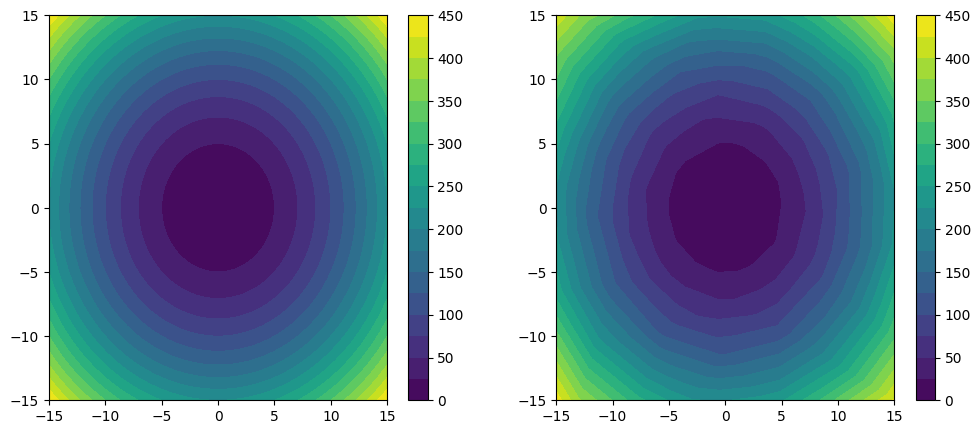

In [12]:
p1 = np.linspace(-15, 15, 1001)
p2 = np.linspace(-15, 15, 1001)

P1, P2 = np.meshgrid(p1, p2)

figsize(12,5)
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.contourf(P1, P2, P1**2 + P2**2, levels=20)
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.colorbar()

plt.subplot(1,2,2)

testx = torch.tensor( np.stack([P1, P2]).reshape( 2, 1001*1001).T, dtype=torch.float32)
testy = trainedModel.forward(testx)
plt.contourf( P1, P2, testy.detach().numpy().reshape(1001, 1001), levels=20)
plt.colorbar()

Ok, so it actually looks quite good. The big error is mostly a function of 1) large values, and 2) lack of representational capacity

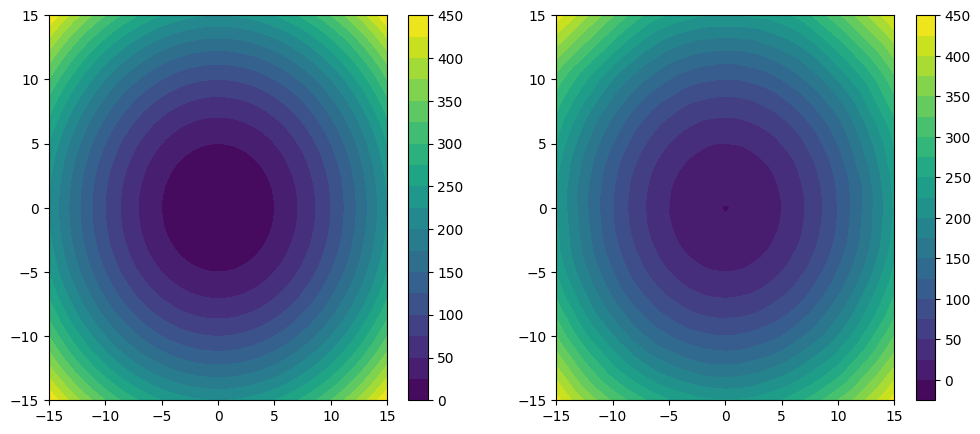

In [17]:
largeVersion = glob.glob('../lightning_logs/simpleQuadratic_largeLatentDim/*')[1]

trainedModel = BasicICNN.load_from_checkpoint(largeVersion)


p1 = np.linspace(-15, 15, 1001)
p2 = np.linspace(-15, 15, 1001)

P1, P2 = np.meshgrid(p1, p2)

figsize(12,5)
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.contourf(P1, P2, P1**2 + P2**2, levels=20)
plt.colorbar()

plt.subplot(1,2,2)

testx = torch.tensor( np.stack([P1, P2]).reshape( 2, 1001*1001).T, dtype=torch.float32)
testy = trainedModel.forward(testx)
plt.contourf( P1, P2, testy.detach().numpy().reshape(1001, 1001), levels=20)
plt.colorbar()
